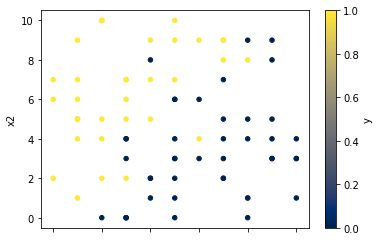

In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
midterm = pd.read_csv('Q2data.csv')
midterm.columns = ['x1', 'x2', 'y']
colormap = ['r', 'b']
midterm.plot.scatter('x1', 'x2', c='y', colormap='cividis')
#rows 1-10
test = midterm.loc[0:10, :]
train = midterm.loc[10:, ]
train = train.to_numpy()
test = test.to_numpy()


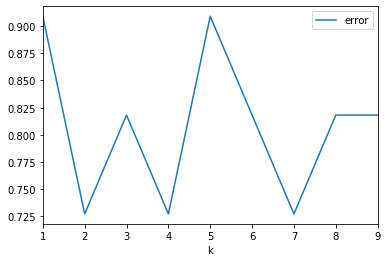

In [5]:
from math import sqrt

# calculate the Euclidean distance between two vectors
def l1_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += abs(row1[i] - row2[i])
	return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = l1_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
 
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    zerocount = 0
    onecount = 0
    for i in range(len(output_values)):
        if output_values[i] == 0:
            zerocount+=1
        else:
            onecount+=1
    if zerocount == onecount:
        prediction = 0
    return prediction

def get_accuracy(predictions, labels):
    error = 0
    for i in range(labels.size):
        error += abs(predictions[i] - labels[i])
    accuracy = (labels.size - error) / labels.size
    #print (error)
    return accuracy 

#test = predict_classification(xtraining, xtraining[10], 3)
#test
# Test distance function
test_error = []
for k in range(1,10):
    preds = []
    for i in range (len(test)):
        preds.append(predict_classification(train, test[i], k))
#preds = preds.append(predict_classification(xtrain, xtrain[0], 3))
#preds
    knn_error = get_accuracy(preds, test[:,2])
    test_error.append((k, knn_error))
test_error
answer = pd.DataFrame(data=test_error, columns=["k", "error"])
answer.plot(x='k', y='error', kind='line')